In [415]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.regularizers import l2

In [416]:
# loading dataset
dataset_path = 'C:/Users/User/Downloads/houseRent/House_Rent_Dataset.csv'
df = pd.read_csv(dataset_path)

In [417]:
print(df.head())

    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner

In [418]:
# Dropping non-numeric columns
df.drop(['Posted On', 'Floor', 'Area Locality', 'Point of Contact'], axis='columns', inplace=True)

In [419]:
# Mapping categorical values to numeric values
df['Area Type'].replace({'Built Area': 0, 'Carpet Area': 1, 'Super Area': 2}, inplace=True)
df['Furnishing Status'].replace({'Unfurnished': 0, 'Semi-Furnished': 1, 'Furnished': 2}, inplace=True)
df['Tenant Preferred'].replace({'Family': 2, 'Bachelors': 1, 'Bachelors/Family': 0}, inplace=True)
df['City'].replace({'Hyderabad': 0, 'Chennai': 1, 'Delhi': 2, 'Bangalore': 3, 'Mumbai': 4, 'Kolkata': 5}, inplace=True)

In [420]:
# Identifying numerical columns for scaling
numerical_columns = ['BHK', 'Rent', 'Size', 'Bathroom', 'Area Type', 'Furnishing Status', 'Tenant Preferred', 'City']

In [421]:
# Extracting numerical features and target variable
X = df[numerical_columns].drop('Rent', axis=1)
y = df['Rent']

In [422]:
# Normalizing the data using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [423]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [424]:
# Building the linear regression model
model = Sequential([
    InputLayer(input_shape=(X_train.shape[1],)),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(16, activation="relu"),
    Dense(1, activation="linear")  # Linear activation for regression
])

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 256)               2048      
                                                                 
 dense_71 (Dense)            (None, 128)               32896     
                                                                 
 dense_72 (Dense)            (None, 64)                8256      
                                                                 
 dense_73 (Dense)            (None, 16)                1040      
                                                                 
 dense_74 (Dense)            (None, 1)                 17        
                                                                 
Total params: 44257 (172.88 KB)
Trainable params: 44257 (172.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [425]:
# Compiling the model
model.compile(optimizer = Adam(learning_rate = 0.01),
              loss = MeanAbsoluteError(),
              metrics = RootMeanSquaredError())

In [426]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
95/95 [==============================] - 2s 13ms/step - loss: 22821.1523 - root_mean_squared_error: 80285.7422 - val_loss: 16298.1211 - val_root_mean_squared_error: 46599.8828
Epoch 2/50
95/95 [==============================] - 0s 3ms/step - loss: 17898.1992 - root_mean_squared_error: 74859.0859 - val_loss: 16723.1426 - val_root_mean_squared_error: 43943.0625
Epoch 3/50
95/95 [==============================] - 0s 3ms/step - loss: 17345.6172 - root_mean_squared_error: 74271.2500 - val_loss: 16011.6553 - val_root_mean_squared_error: 43228.6836
Epoch 4/50
95/95 [==============================] - 0s 3ms/step - loss: 17123.6934 - root_mean_squared_error: 73696.2500 - val_loss: 16001.0762 - val_root_mean_squared_error: 43507.6055
Epoch 5/50
95/95 [==============================] - 0s 3ms/step - loss: 17101.1465 - root_mean_squared_error: 73934.7656 - val_loss: 16737.3574 - val_root_mean_squared_error: 42339.9492
Epoch 6/50
95/95 [==============================] - 0s 3ms/step - los

In [427]:
# Evaluating the model
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Set: {mse}')

30/30 [==============================] - 0s 3ms/step - loss: 11590.7793 - root_mean_squared_error: 40881.3516
Mean Squared Error on Test Set: [11590.779296875, 40881.3515625]


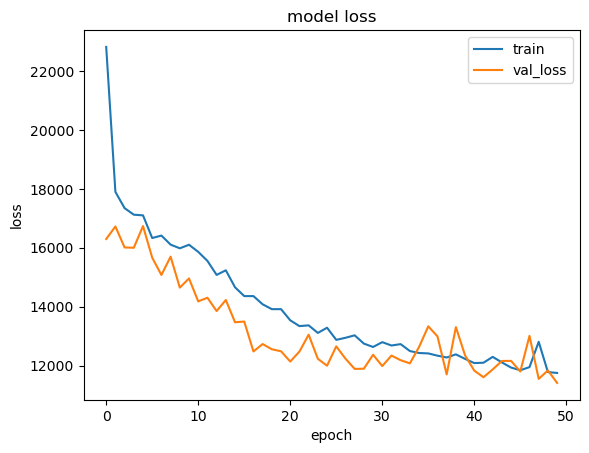

In [428]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show()

In [429]:
# Making predictions on the test set
y_pred = model.predict(X_test)

# Displaying the actual and predicted values
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print(result_df)


30/30 [==============================] - 0s 2ms/step
      Actual     Predicted
1566   16000  14654.202148
3159   12000  14506.379883
538    28000  27024.152344
2630    8000  40161.597656
4418   46000  35267.511719
...      ...           ...
4124   18000  15384.624023
3400   25000  17792.691406
1941   14000  13494.696289
3679   26000  17627.371094
2531   11000  11832.394531

[950 rows x 2 columns]


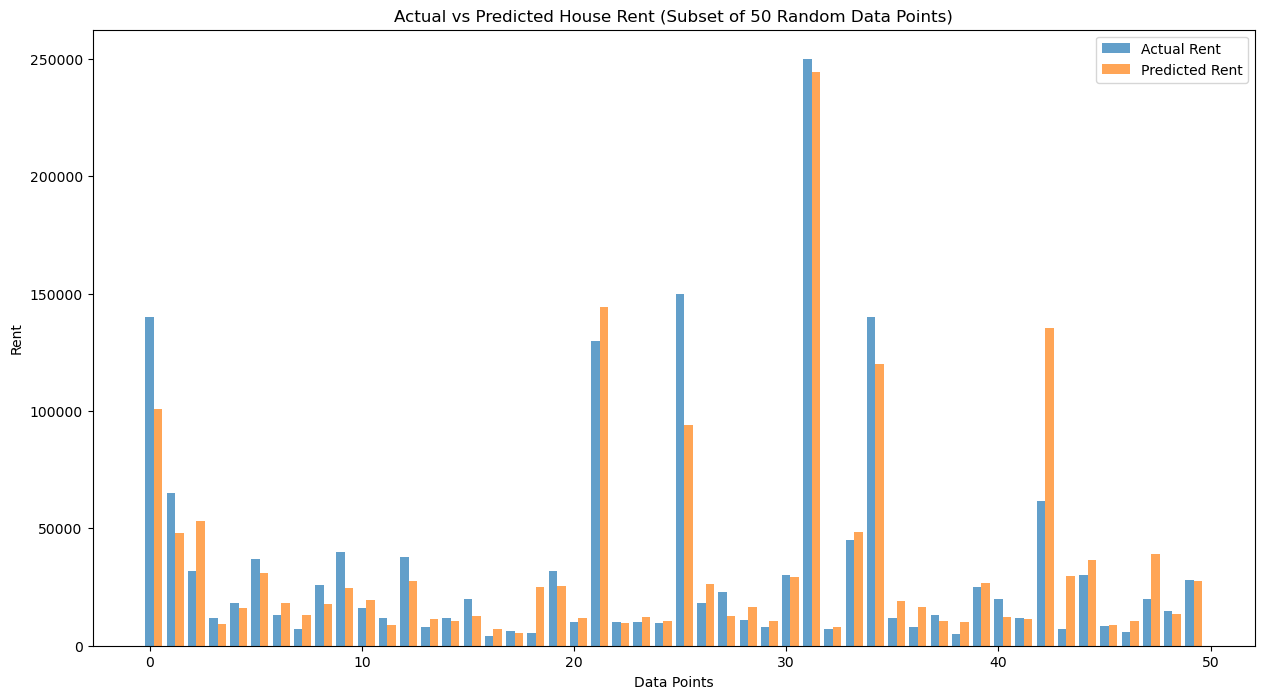

In [430]:
# Generating random indices for a subset of 50 data points
random_indices = np.random.choice(len(y_test), size=50, replace=False)

# Using the selected indices to extract the subset of data
subset_y_test = y_test.iloc[random_indices]
subset_y_pred = y_pred.flatten()[random_indices]

# Generating sample data for demonstration purposes
ind = np.arange(len(subset_y_test))

plt.figure(figsize=(15, 8))

width = 0.4  # Adjusting the width of the bars based on your preference

plt.bar(ind, subset_y_test, width, label='Actual Rent', alpha=0.7)
plt.bar(ind + width, subset_y_pred, width, label='Predicted Rent', alpha=0.7)

plt.xlabel('Data Points')
plt.ylabel('Rent')
plt.title('Actual vs Predicted House Rent (Subset of 50 Random Data Points)')
plt.legend()
plt.show()